In [1]:
import tellurium as te
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyp
import numpy as np
import pandas as pd
import pylab
import seaborn as sns

In [2]:
for_calib = '''/// Created by libAntimony v2.9.4
function Hill_modified(V, substrate, Act, h, Shalve)
  V*substrate*Act^h/(Shalve^h + Act^h);
end

function Mass_action_with_modulation(k1, substare, modulator, k2, product)
  k1*substare*modulator - k2*product;
end

function Mass_action_with_modulation_2(k1, substare, modulator)
  k1*substare*modulator;
end

  // Compartments and Species:
  compartment cell, Outer_space;
  species CD14 in cell, TRAF6 in cell, IKK in cell;
  species IKK_P in cell, $source_DNA in cell, $sink in cell;
  species IkBa in cell, IkBa_NFkB in cell, NFkB in cell;
  species IKK_P_IkBa_NFkB in cell, NFkB_nuc in cell, IkBa_nuc in cell;
  species IkBa_NFkB_nuc in cell, IkBa_mRNA in cell, IKK_P_IkBa in cell;
  species TAK1 in cell, CD14LPS in cell, TLR4LPS_memb in cell;
  species TLR4_memb in cell, CD14LPS_endo in cell, TLR4LPS_endo in cell;
  species TLR4_endo in cell, MYD88 in cell, MYD88_0 in cell;
  species TRIF in cell, TRIF_0 in cell, TRAF6_P in cell;
  species TAK1_P in cell, IkBb in cell, IkBb_NFkB in cell;
  species IkBe in cell, IkBe_NFkB in cell, IKK_P__IkBb_NFkB in cell;
  species IKK_P__IkBe_NFkB in cell, IkBb_nuc in cell, IkBb_NFkB_nuc in cell;
  species IkBe_nuc in cell, IkBe_NFkB_nuc in cell, IkBb_mRNA in cell;
  species IkBe_mRNA in cell, IKK_P__IkBb in cell, IKK_P__IkBe in cell;
  species dimerTLR4LPS_memb in cell, dimerTLR4LPS_endo in cell;
  species NFkBDNA_nuc in cell, NFkB_P in cell, NFkB_P__nuc in cell;
  species IKK_P__IkBa_NFkB_P in cell, NFkBDNA_P__nuc in cell;
  species WIP1 in cell, WIP1_mRNA in cell, LPS in Outer_space;

  // Assignment Rules:
  IkBa_all := IKK_P__IkBa_NFkB_P + IKK_P_IkBa_NFkB + IKK_P_IkBa + IkBa + IkBa_nuc + IkBa_NFkB + IkBa_NFkB_nuc;
  IKK_P__all := IKK_P + IKK_P_IkBa + IKK_P_IkBa_NFkB + IKK_P__IkBa_NFkB_P;
  NFkB_nuc__all := IkBa_NFkB_nuc + NFkB_nuc + NFkBDNA_nuc + NFkB_P__nuc + NFkBDNA_P__nuc + IkBe_NFkB_nuc + IkBb_NFkB_nuc;
  NFkB_P__all := IKK_P__IkBa_NFkB_P + NFkB_P + NFkB_P__nuc + NFkBDNA_P__nuc;
  STAT_all := STAT + STAT_P + JAK_P_STAT + STAT_dimer;
  LPS_all := CD14LPS + TLR4LPS_memb + CD14LPS_endo + TLR4LPS_endo + dimerTLR4LPS_memb + dimerTLR4LPS_endo + LPS;

  // Reactions:

  Module_1__8__LPS_CD14_binding: LPS + CD14 -> CD14LPS; k_26*LPS*CD14 - k_27*CD14LPS;
  Module_1__13__CD14_generation_at_the_membrane: $source_DNA => CD14; cell*k_28*source_DNA;
  Module_1__7__CD14_degradation: CD14 => $sink; cell*k_29*CD14;
  Module_1__5__Association_of_CD14LPS_and_TLR4_atn_the_plamsa_membrane: CD14LPS + TLR4_memb -> TLR4LPS_memb; cell*(k_30*CD14LPS*TLR4_memb - k_31*TLR4LPS_memb);
  Module_1__6__Association_of_CD14LPSen_and_TLR4__in_the_endosome: CD14LPS_endo + TLR4_endo -> TLR4LPS_endo; cell*(k_32*CD14LPS_endo*TLR4_endo - k_33*TLR4LPS_endo);
  Module_1__3__TLR4_memb__generation: $source_DNA => TLR4_memb; cell*k_34*source_DNA;
  Module_1__1__CD14LPS_translocation: CD14LPS -> CD14LPS_endo; cell*(k_35*CD14LPS - k_36*CD14LPS_endo);
  Module_1__9__TLR4_translocation: TLR4_memb -> TLR4_endo; cell*(k_37*TLR4_memb - k_38*TLR4_endo);
  Module_1__15__TLR4LPS_memb__endocytosis: TLR4LPS_memb -> TLR4LPS_endo; cell*(k_39*TLR4LPS_memb - k_40*TLR4LPS_endo);
  Module_1__2__CD14LPS_endo__degradation: CD14LPS_endo => $sink; cell*k_41*CD14LPS_endo;
  Module_1__10__TLR4_endo__degradation: TLR4_endo => $sink; cell*k_42*TLR4_endo;
  Module_1__12__TLR4LPS_memb__dimerization: 2 TLR4LPS_memb -> dimerTLR4LPS_memb; cell*(k_104*TLR4LPS_memb^2 - k_105*dimerTLR4LPS_memb);
  Module_1__11__TLR4LPS_endo__dimerization: 2 TLR4LPS_endo -> dimerTLR4LPS_endo; cell*(k_106*TLR4LPS_endo^2 - k_107*dimerTLR4LPS_endo);
  Module_1__14__dimerTLR4LPS_memb__endocytosis: dimerTLR4LPS_memb -> dimerTLR4LPS_endo; cell*(k_108*dimerTLR4LPS_memb - k_109*dimerTLR4LPS_endo);
  Module_1__4__TLR4LSP_endo__degradation: TLR4LPS_endo => $sink; cell*k_43*TLR4LPS_endo;
  Module_2__1__MYD88_Activation_by_dimerTLR4LPS_memb: MYD88 => MYD88_0; cell*Hill_modified(k_44, MYD88, dimerTLR4LPS_memb, k_45, k_46);
  Module_2__2__MYD88_Deactivation: MYD88_0 => MYD88; cell*k_47*MYD88_0;
  Module_2__3__TRIF_activation_by_dimerTLR4LPS_endo: TRIF -> TRIF_0; cell*Mass_action_with_modulation(k_48, TRIF, dimerTLR4LPS_endo, k_49, TRIF_0);
  Module_2__4__TRAF6_activation_by_MYD88: TRAF6 => TRAF6_P; cell*Mass_action_with_modulation_2(k_50, TRAF6, MYD88_0);
  Module_2__5__TRAF6_activation_by_TRIF: TRAF6 => TRAF6_P; cell*Mass_action_with_modulation_2(k_51, TRAF6, TRIF_0);
  Module_2__7__TRAF6_deactivation: TRAF6_P => TRAF6; cell*k_52*TRAF6_P;
  Module_2__6__TAK1_activation_by_TRAF6: TAK1 -> TAK1_P; cell*Mass_action_with_modulation(k_53, TAK1, TRAF6_P, k_54, TAK1_P);
  Module_2__8__IKK_activation_by_TAK1: IKK => IKK_P; cell*Mass_action_with_modulation_2(k_55, IKK, TAK1_P);
  Module_2__10__IKK_deactivation: IKK_P => IKK; cell*k_56*IKK_P;
  Module_2__9__IKK_activation_by_unknown_signal: IKK => IKK_P; cell*k_57*IKK;
  Module_3_1a__IkBa_plus_NFkB_Binding: IkBa + NFkB -> IkBa_NFkB; cell*(k_1*IkBa*NFkB - k_2*IkBa_NFkB);
  Module_3_12a__IKK_P_plus_IkBa_NFkB_Binding: IKK_P + IkBa_NFkB -> IKK_P_IkBa_NFkB; cell*(k_3*IKK_P*IkBa_NFkB - k_4*IKK_P_IkBa_NFkB);
  Module_3_16a__IKK_P_IkBa_NFkB_Catalys: IKK_P_IkBa_NFkB => IKK_P + NFkB; cell*k_5*IKK_P_IkBa_NFkB;
  Module_3_7a__IkBa_NFkB_Constitutive_Degradation: IkBa_NFkB => NFkB; cell*k_6*IkBa_NFkB;
  Module_3_18__NFkB_Nuclear_Import_and_Export: NFkB -> NFkB_nuc; cell*(k_7*NFkB - k_8*NFkB_nuc);
  Module_3_11a__Nuclear_IkBa_plus_NFkB_Binding: IkBa_nuc + NFkB_nuc -> IkBa_NFkB_nuc; cell*(k_9*IkBa_nuc*NFkB_nuc - k_10*IkBa_NFkB_nuc);
  Module_3_2a__Constitutive_IkBa_mRNA_Synthes: $source_DNA => IkBa_mRNA; cell*k_11*source_DNA;
  Module_3_24a__Inducible_IkBa_mRNA_Synthes: 2 NFkBDNA_nuc => IkBa_mRNA + 2 NFkBDNA_nuc; cell*k_12*NFkBDNA_nuc^2;
  Module_3_6a__IkBa_mRNA_degradation: IkBa_mRNA => $sink; cell*k_13*IkBa_mRNA;
  Module_3_10a__IKK_P_plus_IkBa_Binding: IKK_P + IkBa -> IKK_P_IkBa; cell*(k_14*IKK_P*IkBa - k_15*IKK_P_IkBa);
  Module_3_3a__IkBa_Translation: IkBa_mRNA => IkBa + IkBa_mRNA; cell*k_16*IkBa_mRNA;
  Module_3_4a__IkBa_Degradation: IkBa => $sink; cell*k_17*IkBa;
  Module_3_5a__IkBa_Nuclear_Import_and_Export: IkBa -> IkBa_nuc; cell*(k_18*IkBa - k_19*IkBa_nuc);
  Module_3_13a__IKK_P_IkBa_plus_NFkB_Binding: IKK_P_IkBa + NFkB -> IKK_P_IkBa_NFkB; cell*(k_20*IKK_P_IkBa*NFkB - k_21*IKK_P_IkBa_NFkB);
  Module_3_8a__IkBa_NFkB_Nuclear_Export: IkBa_NFkB_nuc -> IkBa_NFkB; cell*(k_22*IkBa_NFkB_nuc - k_23*IkBa_NFkB);
  Module_3_15a__IKK_P_IkBa_Catalys: IKK_P_IkBa => IKK_P; cell*k_24*IKK_P_IkBa;
  Module_3__9a__IkBa_nuc__Degradation: IkBa_nuc => $sink; cell*k_25*IkBa_nuc;
  Module_3__1b__IkBb___NFkB_Binding: IkBb + NFkB -> IkBb_NFkB; cell*(k_58*IkBb*NFkB - k_59*IkBb_NFkB);
  Module_3__1e__IkBe___NFkB_Binding: IkBe + NFkB -> IkBe_NFkB; cell*(k_60*IkBe*NFkB - k_61*IkBe_NFkB);
  Module_3__12b__IKK_P____IkBb_NFkB_Binding: IKK_P + IkBb_NFkB -> IKK_P__IkBb_NFkB; cell*(k_62*IKK_P*IkBb_NFkB - k_63*IKK_P__IkBb_NFkB);
  Module_3__12e__IKK_P____IkBe_NFkB_Binding: IKK_P + IkBe_NFkB -> IKK_P__IkBe_NFkB; cell*(k_64*IKK_P*IkBe_NFkB - k_65*IKK_P__IkBe_NFkB);
  Module_3__16b__IKK_P__IkBb_NFkB_Catalysis_to_NFkB: IKK_P__IkBb_NFkB => IKK_P + NFkB; cell*k_66*IKK_P__IkBb_NFkB;
  Module_3__16e__IKK_P__IkBe_NFkB_Catalysis_to_NFkB: IKK_P__IkBe_NFkB => IKK_P + NFkB; cell*k_67*IKK_P__IkBe_NFkB;
  Module_3__7b__IkBb_NFkB_Constitutive_Degradation: IkBb_NFkB => NFkB; cell*k_68*IkBb_NFkB;
  Module_3__7e__IkBe_NFkB_Constitutive_Degradation: IkBe_NFkB => NFkB; cell*k_69*IkBe_NFkB;
  Module_3__11b__Nuclear_IkBb___NFkB_Binding: IkBb_nuc + NFkB_nuc -> IkBb_NFkB_nuc; cell*(k_70*IkBb_nuc*NFkB_nuc - k_71*IkBb_NFkB_nuc);
  Module_3__11e__Nuclear_IkBe___NFkB_Binding: IkBe_nuc + NFkB_nuc -> IkBe_NFkB_nuc; cell*(k_72*IkBe_nuc*NFkB_nuc - k_73*IkBe_NFkB_nuc);
  Module_3__2b__Constitutive_IkBb_mRNA_Synthesis: $source_DNA => IkBb_mRNA; cell*k_74*source_DNA;
  Module_3__2e__Constitutive_IkBe_mRNA_Synthesis: $source_DNA => IkBe_mRNA; cell*k_75*source_DNA;
  Module_3__24b__Inducible_IkBb_mRNA_Synthesis: 2 NFkB_nuc => IkBb_mRNA + 2 NFkBDNA_nuc; cell*k_76*NFkB_nuc^2;
  Module_3__24e__Inducible_IkBe_mRNA_Synthesis: 2 NFkB_nuc => IkBe_mRNA + 2 NFkBDNA_nuc; cell*k_77*NFkB_nuc^2;
  Module_3__6b__IkBb_mRNA_degradation: IkBb_mRNA => $sink; cell*k_78*IkBb_mRNA;
  Module_3__6e__IkBe_mRNA_degradation: IkBe_mRNA => $sink; cell*k_79*IkBe_mRNA;
  Module_3__10b__IKK_P____IkBb_Binding: IKK_P + IkBb -> IKK_P__IkBb; cell*(k_80*IKK_P*IkBb - k_81*IKK_P__IkBb);
  Module_3__10e__IKK_P____IkBe_Binding: IKK_P + IkBe -> IKK_P__IkBe; cell*(k_82*IKK_P*IkBe - k_83*IKK_P__IkBe);
  Module_3__3b__IkBb_Translation: IkBb_mRNA => IkBb + IkBb_mRNA; cell*k_84*IkBb_mRNA;
  Module_3__3e__IkBe_Translation: IkBe_mRNA => IkBe + IkBe_mRNA; cell*k_85*IkBe_mRNA;
  Module_3__4e__IkBe_Degradation: IkBe => $sink; cell*k_86*IkBe;
  Module_3__4b__IkBb_Degradation: IkBb => $sink; cell*k_87*IkBb;
  Module_3__9b__IkBb_nuc__Degradation: IkBb_nuc => $sink; cell*k_88*IkBb_nuc;
  Module_3__9e__IkBe_nuc__Degradation: IkBe_nuc => $sink; cell*k_89*IkBe_nuc;
  Module_3__5b__IkBb_Nuclear_Import_Export: IkBb -> IkBb_nuc; cell*(k_90*IkBb - k_91*IkBb_nuc);
  Module_3__5e__IkBe_Nuclear_Import_Export: IkBa -> IkBa_nuc; cell*(k_92*IkBa - k_93*IkBa_nuc);
  Module_3__13b__IKK_P__IkBb___NFkB_Binding: IKK_P__IkBb + NFkB -> IKK_P__IkBb_NFkB; cell*(k_94*IKK_P__IkBb*NFkB - k_95*IKK_P__IkBb_NFkB);
  Module_3__13e__IKK_P__IkBe___NFkB_Binding: IKK_P__IkBe + NFkB -> IKK_P__IkBe_NFkB; cell*(k_96*IKK_P__IkBe*NFkB - k_97*IKK_P__IkBe_NFkB);
  Module_3__8b__IkBb_NFkB_Nuclear_Export: IkBb_NFkB_nuc -> IkBb_NFkB; cell*(k_98*IkBb_NFkB_nuc - k_99*IkBb_NFkB);
  Module_3__8e__IkBe_NFkB_Nuclear_Export: IkBe_NFkB_nuc -> IkBe_NFkB; cell*(k_100*IkBe_NFkB_nuc - k_101*IkBe_NFkB);
  Module_3__15b__IKK_P__IkBb_Catalysis: IKK_P__IkBb => IKK_P; cell*k_102*IKK_P__IkBb;
  Module_3__15e__IKK_P__IkBe_Catalysis: IKK_P__IkBe => IKK_P; cell*k_103*IKK_P__IkBe; 
  Module_3__20__NFkB_to_DNA_binding: NFkB_nuc -> NFkBDNA_nuc; cell*(k_110*NFkB_nuc - k_111*NFkBDNA_nuc);
  Module_3__19__NFkB_P__Nuclear_Import_Export: NFkB_P -> NFkB_P__nuc; cell*(k_112*NFkB_P - k_113*NFkB_P__nuc);
  Module_3__11aP__Nuclear_IkBa___NFkB_P__Binding: IkBa_nuc + NFkB_P__nuc -> IkBa_NFkB_nuc; cell*(k_114*IkBa_nuc*NFkB_P__nuc - k_115*IkBa_NFkB_nuc);
  Module_3__21__NFkB_P__to_DNA_binding: NFkB_P__nuc -> NFkBDNA_P__nuc; cell*(k_116*NFkB_P__nuc - k_117*NFkBDNA_P__nuc);
  Module_3__1aP__IkBa___NFkB_P__Binding: IkBa + NFkB_P -> IkBa_NFkB; cell*(k_118*IkBa*NFkB_P - k_119*IkBa_NFkB);
  Module_3__23__NFkB_P__nuc__dephosphorylation: NFkB_P__nuc => NFkB_nuc; cell*k_120*NFkB_P__nuc;
  Module_3__17__IKK_P__IkBa_NFkB_P__Catalysis_to_NFkB_P: IKK_P__IkBa_NFkB_P => IKK_P + NFkB_P; cell*k_121*IKK_P__IkBa_NFkB_P;
  Module_3__11aP2__IKK_P__IkBa___NFkB_P__Binding: IKK_P_IkBa + NFkB_P -> IKK_P__IkBa_NFkB_P; cell*(k_122*IKK_P_IkBa*NFkB_P - k_123*IKK_P__IkBa_NFkB_P);
  Module_3__14__IKK_P__IkBa_NFkB_phosphorylation: IKK_P_IkBa_NFkB => IKK_P__IkBa_NFkB_P; cell*k_124*IKK_P_IkBa_NFkB;
  Module_3__22__NFkB_P__dephosphorylation: NFkB_P => NFkB; cell*k_125*NFkB_P;
  Module_3__23___DNA__NFkBDNA_P__nuc__dephosphorylation: NFkBDNA_P__nuc => NFkBDNA_nuc; cell*k_128*NFkBDNA_P__nuc;
  Module_3__24aPP__Inducible_IkBa_mRNA_Synthesis__NFkBDNA_P__nuc_: 2 NFkBDNA_P__nuc => IkBa_mRNA + 2 NFkBDNA_P__nuc; cell*k_129*NFkBDNA_P__nuc^2;
  Module_3__11___DNA__Nuclear_IkBa___NFkBDNA_Binding: IkBa_nuc + NFkBDNA_nuc -> IkBa_NFkB_nuc; cell*(k_130*IkBa_nuc*NFkBDNA_nuc - k_131*IkBa_NFkB_nuc);
  Module_3__24aP__Inducible_IkBa_mRNA_Synthesis: NFkBDNA_P__nuc + NFkBDNA_nuc => IkBa_mRNA + NFkBDNA_P__nuc + NFkBDNA_nuc; cell*k_132*NFkBDNA_P__nuc*NFkBDNA_nuc; 
  wipi1:  2 NFkBDNA_nuc -> WIP1_mRNA + 2 NFkBDNA_nuc; cell*k_300*NFkBDNA_nuc^2;
  wipi2: NFkBDNA_P__nuc + NFkBDNA_nuc -> WIP1_mRNA + NFkBDNA_P__nuc + NFkBDNA_nuc; cell*k_301*NFkBDNA_P__nuc*NFkBDNA_nuc;
  wipi3: WIP1 -> sink; cell*k_302*WIP1;
  wipi4: WIP1_mRNA -> sink; cell*k_303*WIP1_mRNA;
  wipi5: WIP1_mRNA -> WIP1 + WIP1_mRNA; cell*k_304*WIP1_mRNA;
  Module_3__23__NFkB_P__nuc__dephosphorylation_by_WIP1: NFkB_P__nuc => NFkB_nuc; cell*Mass_action_with_modulation_2(k_136, NFkB_P__nuc, WIP1);
  Module_3__22__NFkB_P__dephosphorylation_by_WIP1: NFkB_P => NFkB; cell*Mass_action_with_modulation_2(k_137, NFkB_P, WIP1);
  TNFa1:  2 NFkBDNA_nuc -> TNFa_mRNA + 2 NFkBDNA_nuc; cell*k_300*NFkBDNA_nuc^2;
  TNFa2: NFkBDNA_P__nuc + NFkBDNA_nuc -> TNFa_mRNA + NFkBDNA_P__nuc + NFkBDNA_nuc; cell*k_301*NFkBDNA_P__nuc*NFkBDNA_nuc;
  TNFa3: TNFa_mRNA -> sink; cell*k_305*TNFa_mRNA;
  Module_4__8__MEK1_2_activation_by_TAK1: MEK1_2 => MEK1_2_P; cell*Mass_action_with_modulation_2(k_163, MEK1_2, TAK1_P);
  Module_4__8__MEK1_2_P__deactivation: MEK1_2_P => MEK1_2; cell*k_164*MEK1_2_P;
  Module_4__8__ERK1_2__activation_by_MEK1_2_P__P: ERK1_2 => ERK1_2_P; cell*Mass_action_with_modulation_2(k_165, ERK1_2, MEK1_2_P__P);
  Module_4__8__ERK1_2_P__deactivation: ERK1_2_P => ERK1_2; cell*k_166*ERK1_2_P;
  Module_4__8__MEK1_2_P__phosphorylation_by_TAK1: MEK1_2_P => MEK1_2_P__P; cell*Mass_action_with_modulation_2(k_167, MEK1_2_P, TAK1_P);
  Module_4__8__MEK1_2_P__P__deactivation: MEK1_2_P__P => MEK1_2_P; cell*k_168*MEK1_2_P__P;
  Module_4__8__ERK1_2_P___phosphorylation_by_MEK1_2_P__P: ERK1_2_P => ERK1_2_P__P; cell*Mass_action_with_modulation_2(k_169, ERK1_2_P, MEK1_2_P__P);
  Module_4__8__ERK1_2_P__P__deactivation: ERK1_2_P__P => ERK1_2_P; cell*k_170*ERK1_2_P__P;
  Module_4__8__MKK3_6_activation_by_TAK1: MKK3_6 => MKK3_6_P; cell*Mass_action_with_modulation_2(k_172, MKK3_6, TAK1_P);
  Module_4__8__MKK3_6_P__deactivation: MKK3_6_P => MKK3_6; cell*k_173*MKK3_6_P;
  Module_4__8__p38_phosphorylation_by_MKK3_6: p38 => p38_P; cell*Mass_action_with_modulation_2(k_174, p38, MKK3_6_P);
  Module_4__8__p38_P__deactivation: p38_P => p38; cell*k_175*p38_P;
  Module_4__8_AP1_degradation: AP1_0 => $sink; cell*k_176*AP1_0;
  Module_4__8__MKP_1_generation: $sink => MKP_1; cell*Mass_action_with_modulation_2(k_177, sink, p38_P);
  Module_4__8__MKP_1_degradation: MKP_1 => $sink; cell*k_178*MKP_1;
  Module_4__8__p38_deactivation_by_MKP_1: p38_P => p38; cell*Mass_action_with_modulation_2(k_179, p38_P, MKP_1);
  Module_4_R1_transcript_complex_AP1_activation: Elk => Elk_0; cell*Mass_action_with_modulation_2(k_169, Elk, ERK1_2_P__P);
  Module_4_R2_Elk_1_nuclear_import_export: Elk_0 -> Elk_0_nuc; cell*(k_151*Elk_0 - k_152*Elk_0_nuc);
  Module_4_R3_tr_complex_AP1_to_DNA_binding: Elk_0_nuc => Elk_0_DNA; cell*(k_153*Elk_0_nuc - k_154*Elk_0_DNA);
  Module_4_R4_Inducible_AP1_Synthesis: 2 Elk_0_DNA => AP1 + 2 Elk_0_DNA; cell*k_155*Elk_0_DNA^2;
  Module_4_R5_AP1_degradation: AP1 => $sink; cell*k_183*AP1;;
  Module_4_R7_AP1_activation: AP1 => AP1_0; cell*Mass_action_with_modulation_2(k_156, AP1, ERK1_2_P__P);
  Module_4_R8_AP1_deactivation: AP1_0 => AP1; cell*k_189*AP1_0;
  R1_TRAF2_activation_by_TRIF: TRAF3 => TRAF3_P; cell*Mass_action_with_modulation_2(k_140, TRAF3, TRIF_0);
  R2_TRAF2_deactivation: TRAF3_P => TRAF3; cell*k_141*TRAF3_P;
  R3_TBK_IKKe_activation: TBKIKKe => TBKIKKe_P; cell*Mass_action_with_modulation(k_142, TBKIKKe, TRAF3_P, k_143, TBKIKKe_P);
  R4_IRF3_7_activation: IRF3_7 => IRF3_7_P; cell*Mass_action_with_modulation_2(k_144, IRF3_7, TBKIKKe_P);
  R5_IRF3_7_P__Nuclear_Import_Export: IRF3_7_P -> IRF3_7_P_nuc; cell*(k_145*IRF3_7_P - k_146*IRF3_7_P_nuc);
  R6_IRF3_7_P__nuc_to_DNA_binding: IRF3_7_P_nuc -> IRF3_7_P_DNA_nuc; cell*(k_147*IRF3_7_P_nuc - k_148*IRF3_7_P_DNA_nuc);
  R7_Inducible_INH_Pin1_Synthesis__from_AP_1: AP1_0 =>  Pin1_nuc + AP1_0; cell*k_157*AP1_0;
  R8_Inducible_IFNb_mRNA_Synthesis__IRF3_7_P_DNA_nuc: 2 IRF3_7_P_DNA_nuc => IFNb_mRNA  + 2 IRF3_7_P_DNA_nuc; cell*k_149*IRF3_7_P_DNA_nuc^2;
  R9_IFNb_mRNA_degradation: IFNb_mRNA => $sink; cell*k_150*IFNb_mRNA;
  R10_Inhibition_of_IRF_in_nuc: Pin1 + IRF3_7_P -> Pin1; cell*k_139*Pin1*IRF3_7_P;
  R11_Pin1__Nuclear_Import_Export: Pin1_nuc -> Pin1; cell*(k_145*Pin1_nuc - k_146*Pin1);
  R12_Pin1_degradation: Pin1 => $sink; cell*k_158*Pin1;
  R13_Pin1_nuc_degradation: Pin1_nuc => $sink; cell*k_159*Pin1_nuc;
  R14_Constitutive_Pin1_Synthes: $source_DNA => Pin1; cell*k_160*source_DNA;
  R15_Constitutive_IRF_Synthes: $source_DNA => IRF3_7; cell*k_161*source_DNA;
  R16_IFNb_translation_in_cytoplasm: IFNb_mRNA => IFNb + IFNb_mRNA; cell*k_190*IFNb_mRNA;
  R17_IFNb_degrad_in_open_space: IFNb => $sink; cell*k_194*IFNb;
  R18_IRF73_7degradation: IRF3_7 => $sink; cell*k_306*IRF3_7;
  iNOS1_IFNb_interaction_with_receptor: IFNb + receptor -> IFNb_receptor; cell*(k_195*IFNb*receptor - k_196*IFNb_receptor);
  iNOS1_IFNb_interaction_with_receptor: IFNb + receptor -> IFNb_receptor; cell*(k_195*IFNb*receptor - k_196*IFNb_receptor);
  iNOS2_JAK_activation_by_receptor_IFNb: JAK => JAK_P; cell*Mass_action_with_modulation(k_197, JAK, IFNb_receptor, k_198, JAK_P);
  iNOS3_JAK_STAT_binding: STAT + JAK_P -> JAK_P_STAT; cell*(k_199*JAK_P*STAT - k_200*JAK_P_STAT);
  iNOS4_STAT_activation: JAK_P_STAT => STAT_P + JAK_P; cell*(k_201*JAK_P_STAT - k_202*STAT_P*JAK_P);
  iNOS5_constitutive_JAK_synthesis: $source_DNA => JAK; cell*k_28*source_DNA;
  iNOS6_JAK_degrad: JAK => $sink; cell*k_191*JAK;
  iNOS7_STAT_dimerization: 2 STAT_P => STAT_dimer; cell*k_203*STAT_P^2;
  iNOS8_STAT_dimer_degrad: STAT_dimer => $sink; cell*k_204*STAT_dimer;
  iNOS9_Trascript_complex_formation: AP1_0 + NFkBDNA_P__nuc => complex1 + AP1_0 + NFkBDNA_P__nuc; cell*k_205*AP1_0*NFkBDNA_P__nuc;
  inos10: complex1 => $sink; cell*k_213*complex1; 
  iNOS11: complex1 + STAT_dimer -> complex + 2 STAT; cell*k_212*complex1*STAT_dimer;
  iNOS12_Trascript_complex_degrad: complex => $sink; cell*k_206*complex;
  iNOS13_iNOS_translation: complex => iNOS_mRNA + complex; cell*k_207*complex;
  iNOS14_iNOS_mRNA_degradation: iNOS_mRNA => $sink; cell*k_208*iNOS_mRNA;
  
 // Species initializations:
  CD14 = 1.27572813322247;
  TRAF6 = 0.1;
  IKK = 0.099008993913547;
  IKK_P = 0.000627056961453603;
  source_DNA = 1;
  sink = 1;
  IkBa = 0.0068318214457154;
  IkBa_NFkB = 0.100566411813644;
  NFkB = 2.96843215585344e-05;
  IKK_P_IkBa_NFkB = 6.94924229969023e-07;
  NFkB_nuc = 0.000118403061794377;
  IkBa_nuc = 0.00150269684026404;
  IkBa_NFkB_nuc = 0.000852545350537757;
  IkBa_mRNA = 0.00684749809227682;
  IKK_P_IkBa = 4.72055947707394e-06;
  TAK1 = 0.1;
  CD14LPS = 0;
  TLR4LPS_memb = 0;
  TLR4_memb = 0.0157111038315332;
  CD14LPS_endo = 0;
  TLR4LPS_endo = 0;
  TLR4_endo = 0.000803981623277179;
  MYD88 = 0.1;
  MYD88_0 = 0;
  TRIF = 0.1;
  TRIF_0 = 0;
  TRAF6_P = 0;
  TAK1_P = 0;
  IkBb = 0.000785153066672975;
  IkBb_NFkB = 0.000447266681657775;
  IkBe = 0.00116918824235833;
  IkBe_NFkB = 0.000388653897108476;
  IKK_P__IkBb_NFkB = 3.22490615176982e-07;
  IKK_P__IkBe_NFkB = 2.76341428559073e-07;
  IkBb_nuc = 3.61356206057946e-05;
  IkBb_NFkB_nuc = 3.09996241012539e-07;
  IkBe_nuc = 8.15797209251918e-67;
  IkBe_NFkB_nuc = 4.67488542410699e-15;
  IkBb_mRNA = 0.000595238595926841;
  IkBe_mRNA = 0.000847468319793696;
  IKK_P__IkBb = 1.44502786813675e-07;
  IKK_P__IkBe = 3.22751573679188e-07;
  dimerTLR4LPS_memb = 0;
  dimerTLR4LPS_endo = 0;
  NFkBDNA_nuc = 0.0154104352965078;
  NFkB_P = 9.98805292961457e-05;
  NFkB_P__nuc = 8.84825314227961e-06;
  IKK_P__IkBa_NFkB_P = 0.000357467554888145;
  NFkBDNA_P__nuc = 0.00671879948736981;
  WIP1 = 0.00500993254451801;
  WIP1_mRNA = 0.00250496627544496;
  MEK1_2 = 0.1;
  MEK1_2_P = 0;
  ERK1_2 = 0.1;
  ERK1_2_P = 0;
  MEK1_2_P__P = 0;
  ERK1_2_P__P = 0;
  AP = 0;
  MKK3_6 = 0.1;
  MKK3_6_P = 0;
  p38 = 0.1;
  p38_P = 0;
  MKP_1 = 0;
  Elk = 0.1;
  Elk_0 = 0;
  c_Fos = 0.0;
  Elk_0_DNA = 0;
  Elk_0_nuc = 0;
  ERK1_2_P__P_nuc = 0;
  TRAF3 = 0.1;
  TRAF3_P = 0;
  TBKIKKe = 0.1; 
  TBKIKKe_P = 0;
  IRF3_7 = 0.102666;
  IRF3_7_P = 0;
  IRF3_7_P_nuc = 0;
  IRF3_7_P_DNA_nuc = 0;
  IFNb_mRNA = 0;
  Pin1 = 0.920787;
  Pin1_nuc = 0.0792125;
  IFNb_inner = 0;
  IFNb = 0;
  IFNb_receptor = 0;
  receptor = 0.0157111038315332;
  JAK = 1.12;
  JAK_P = 0;
  STAT = 0.1;
  STAT_P = 0;
  JAK_P_STAT = 0;
  STAT_dimer = 0;
  complex = 0;
  complex1 =0;
  iNOS_mRNA = 0;
  TNFa_mRNA = 0.00928935;

  
  // Compartment initializations:
  cell = 1;
  Outer_space = 1000;

  // Variable initializations:
  k_1 = 30;
  k_2 = 6e-05;
  k_3 = 11.1;
  k_4 = 0.075;
  k_5 = 7.2;
  k_6 = 6e-05;
  k_7 = 5.454;
  k_8 = 0.0048;
  k_9 = 30;
  k_10 = 6e-05;
  k_11 = 9.24e-05;
  k_12 = 0.377801;
  k_13 = 0.0348;
  k_14 = 1.35;
  k_15 = 0.0018;
  k_16 = 0.25;
  k_17 = 0.12;
  k_18 = 0.09;
  k_19 = 0.012;
  k_20 = 30;
  k_21 = 6e-05;
  k_22 = 0.828;
  k_23 = 0;
  k_24 = 1.224;
  k_25 = 0.12;
  k_26 = 8.75;
  k_27 = 0.07;
  k_28 = 0.00112;
  k_29 = 0.00087793;
  k_30 = 5.543;
  k_31 = 0.295059;
  k_32 = 5.543;
  k_33 = 0.295059;
  k_34 = 5.25e-05;
  k_35 = 0.065681;
  k_36 = 0.04;
  k_37 = 0.028928;
  k_38 = 0.5;
  k_39 = 0.065681;
  k_40 = 0.04;
  k_41 = 0.03;
  k_42 = 0.0653;
  k_43 = 0.0145;
  k_44 = 52.8978;
  k_45 = 3;
  k_46 = 0.00175;
  k_47 = 150.701;
  k_48 = 250;
  k_49 = 1.45783;
  k_50 = 200;
  k_51 = 50;
  k_52 = 10;
  k_53 = 8;
  k_54 = 3.87385;
  k_55 = 200;
  k_56 = 6;
  k_57 = 0.038;
  k_58 = 30;
  k_59 = 6e-05;
  k_60 = 30;
  k_61 = 6e-05;
  k_62 = 2.88;
  k_63 = 0.105;
  k_64 = 4.20;
  k_65 = 0.105;
  k_66 = 2.4;
  k_67 = 3.6;
  k_68 = 6e-05;
  k_69 = 6e-05;
  k_70 = 30;
  k_71 = 6e-05;
  k_72 = 30;
  k_73 = 6e-05;
  k_74 = 1e-05;
  k_75 = 1e-05;
  k_76 = 0.0006;
  k_77 = 0.009;
  k_78 = 0.0168;
  k_79 = 0.0118;
  k_80 = 0.36;
  k_81 = 0.0018;
  k_82 = 0.54;
  k_83 = 0.0018;
  k_84 = 0.25;
  k_85 = 0.25;
  k_86 = 0.18;
  k_87 = 0.18;
  k_88 = 0.18;
  k_89 = 0.18;
  k_90 = 0.009;
  k_91 = 0.012;
  k_92 = 0.045;
  k_93 = 0.012;
  k_94 = 30;
  k_95 = 6e-05;
  k_96 = 30;
  k_97 = 6e-05;
  k_98 = 0.414;
  k_99 = 0;
  k_100 = 0.414;
  k_101 = 0.0;
  k_102 = 1.224;
  k_103 = 1.224;
  k_104 = 21;
  k_105 = 0.5;
  k_106 = 21;
  k_107 = 0.5;
  k_108 = 0.131;
  k_109 = 0.08;
  k_110 = 60;
  k_111 = 0.45;
  k_112 = 5.454;
  k_113 = 0.0048;
  k_114 = 30;
  k_115 = 6e-05;
  k_116 = 60;
  k_117 = 1.63763e-05;
  k_118 = 0;
  k_119 = 0;
  k_120 = 0.031;
  k_121 = 1.944;
  k_122 = 30;
  k_123 = 6e-05;
  k_124 = 1000;
  k_125 = 0.001;
  k_126 = 0.680996;
  k_127 = 0.00827095;
  k_128 = 0.079;
  k_129 = 0.377801;
  k_130 = 30.24;
  k_131 = 1e-06;
  k_132 = 0.377801;
  k_133 = 0.2;
  k_134 = 0.1;
  k_135 = 0.680996;
  k_136 = 300;
  k_137 = 300;
  k_138 = 0.09;
  k_139 = 1;
  k_140 = 77.09250372705353;
  k_141 = 10;
  k_142 = 6.24272745026957;
  k_143 = 5.756270066093709;
  k_144 = 10.249041011362358;
  k_145 = 7.171467740976027;
  k_146 = 0.617799604519349;
  k_147 = 24.5245403110935;
  k_148 = 3.4;
  k_149 = 2.17;
  k_150 = 0.0348;
  
  k_151 = 33.02345738521963;
  k_152 = 4.206309966608416;
  k_153 = 85.01568464613676;
  k_154 = 0.09026079519333585;
  k_155 = 0.5; 
  k_156 = 200;
  k_157 = 0.02;
  k_158 = 0.01;
  k_159 = 0.01;
  k_160 = 0.01;
  k_161 = 9.24e-05;
  k_163 = 400;
  k_164 = 0.13;
  k_165 = 353.4;
  k_166 = 49;
  k_167 = 400;
  k_168 = 20;
  k_169 = 353.4;
  k_170 = 2.1873931616854674;
  k_171 = 0.08;
  k_172 = 400;
  k_173 = 10;
  k_174 = 200;
  k_175 = 10;
  k_176 = 0.00808158;
  k_177 = 0.134935;
  k_178 = 0.085;
  k_179 = 210;
  k_180 = 20;
  k_181 = 50;
  k_182 = 300;
  k_183 = 0.22;
  k_184 = 0.08438003257432022;
  k_185 = 0.001;
  k_186 = 0;
  k_187 = 16.31349868257913;
  k_188 = 0.0015;
  k_189 = 0.005;
  k_190 = 0.25;
  k_191 = 0.001;
  k_192 = 46.84734360307521;
  k_193 = 11.17629025396757;
  k_194 = 0.00008;
  k_195 = 5.543;
  k_196 = 0.295059;
  k_197 = 5.716283714389192;
  k_198 = 3.386464996111908;
  k_199 = 7;
  k_200 = 0.0005;
  k_201 = 0.002;
  k_202 = 0.002;
  k_203 = 1;
  k_204 = 0.03; //0.003
  k_205 = 30;
  k_206 = 0.05;
  k_207 = 5;
  k_208 = 0.05;
  k_209 = 0.1;
  k_210 = 0.45;
  k_211 = 5;
  k_212 = 1;
  k_213 = 0.035;
  k_300 = 0.680996;
  k_301 = 0.680996;
  k_302 = 0.1;
  k_303 = 0.0927095;
  k_304 = 0.2;
  k_305 = 0.025;
  k_306 = 0.0009; 
  k = 0;
  k0 = 0;
  
  // Other declarations:
  var IkBa_all, IKK_P__all, NFkB_nuc__all, NFkB_P__all;
  const cell, Outer_space;

  // Unit definitions:
  unit time_unit = 60 second;
  unit substance = 1e-6 mole
  
  LPS = 0.005; 
'''
for_calibr = te.loada(for_calib)

In [3]:
dicti = {'TNFa': [], 'IFN-β': [], 'iNOS': []}


In [4]:
m = '''// Created by libAntimony v2.9.4
function Hill_modified(V, substrate, Act, h, Shalve)
  V*substrate*Act^h/(Shalve^h + Act^h);
end

function Mass_action_with_modulation(k1, substare, modulator, k2, product)
  k1*substare*modulator - k2*product;
end

function Mass_action_with_modulation_2(k1, substare, modulator)
  k1*substare*modulator;
end

  // Compartments and Species:
  compartment cell, Outer_space;
  species CD14 in cell, TRAF6 in cell, IKK in cell;
  species IKK_P in cell, $source_DNA in cell, $sink in cell;
  species IkBa in cell, IkBa_NFkB in cell, NFkB in cell;
  species IKK_P_IkBa_NFkB in cell, NFkB_nuc in cell, IkBa_nuc in cell;
  species IkBa_NFkB_nuc in cell, IkBa_mRNA in cell, IKK_P_IkBa in cell;
  species TAK1 in cell, CD14LPS in cell, TLR4LPS_memb in cell;
  species TLR4_memb in cell, CD14LPS_endo in cell, TLR4LPS_endo in cell;
  species TLR4_endo in cell, MYD88 in cell, MYD88_0 in cell;
  species TRIF in cell, TRIF_0 in cell, TRAF6_P in cell;
  species TAK1_P in cell, IkBb in cell, IkBb_NFkB in cell;
  species IkBe in cell, IkBe_NFkB in cell, IKK_P__IkBb_NFkB in cell;
  species IKK_P__IkBe_NFkB in cell, IkBb_nuc in cell, IkBb_NFkB_nuc in cell;
  species IkBe_nuc in cell, IkBe_NFkB_nuc in cell, IkBb_mRNA in cell;
  species IkBe_mRNA in cell, IKK_P__IkBb in cell, IKK_P__IkBe in cell;
  species dimerTLR4LPS_memb in cell, dimerTLR4LPS_endo in cell;
  species NFkBDNA_nuc in cell, NFkB_P in cell, NFkB_P__nuc in cell;
  species IKK_P__IkBa_NFkB_P in cell, NFkBDNA_P__nuc in cell;
  species WIP1 in cell, WIP1_mRNA in cell, LPS in Outer_space;

  // Assignment Rules:
  IkBa_all := IKK_P__IkBa_NFkB_P + IKK_P_IkBa_NFkB + IKK_P_IkBa + IkBa + IkBa_nuc + IkBa_NFkB + IkBa_NFkB_nuc;
  IKK_P__all := IKK_P + IKK_P_IkBa + IKK_P_IkBa_NFkB + IKK_P__IkBa_NFkB_P;
  NFkB_nuc__all := IkBa_NFkB_nuc + NFkB_nuc + NFkBDNA_nuc + NFkB_P__nuc + NFkBDNA_P__nuc + IkBe_NFkB_nuc + IkBb_NFkB_nuc;
  NFkB_P__all := IKK_P__IkBa_NFkB_P + NFkB_P + NFkB_P__nuc + NFkBDNA_P__nuc;
  STAT_all := STAT + STAT_P + JAK_P_STAT + STAT_dimer;
  LPS_all := CD14LPS + TLR4LPS_memb + CD14LPS_endo + TLR4LPS_endo + dimerTLR4LPS_memb + dimerTLR4LPS_endo + LPS;

  // Reactions:

  Module_1__8__LPS_CD14_binding: LPS + CD14 -> CD14LPS; k_26*LPS*CD14 - k_27*CD14LPS;
  Module_1__13__CD14_generation_at_the_membrane: $source_DNA => CD14; cell*k_28*source_DNA;
  Module_1__7__CD14_degradation: CD14 => $sink; cell*k_29*CD14;
  Module_1__5__Association_of_CD14LPS_and_TLR4_atn_the_plamsa_membrane: CD14LPS + TLR4_memb -> TLR4LPS_memb; cell*(k_30*CD14LPS*TLR4_memb - k_31*TLR4LPS_memb);
  Module_1__6__Association_of_CD14LPSen_and_TLR4__in_the_endosome: CD14LPS_endo + TLR4_endo -> TLR4LPS_endo; cell*(k_32*CD14LPS_endo*TLR4_endo - k_33*TLR4LPS_endo);
  Module_1__3__TLR4_memb__generation: $source_DNA => TLR4_memb; cell*k_34*source_DNA;
  Module_1__1__CD14LPS_translocation: CD14LPS -> CD14LPS_endo; cell*(k_35*CD14LPS - k_36*CD14LPS_endo);
  Module_1__9__TLR4_translocation: TLR4_memb -> TLR4_endo; cell*(k_37*TLR4_memb - k_38*TLR4_endo);
  Module_1__15__TLR4LPS_memb__endocytosis: TLR4LPS_memb -> TLR4LPS_endo; cell*(k_39*TLR4LPS_memb - k_40*TLR4LPS_endo);
  Module_1__2__CD14LPS_endo__degradation: CD14LPS_endo => $sink; cell*k_41*CD14LPS_endo;
  Module_1__10__TLR4_endo__degradation: TLR4_endo => $sink; cell*k_42*TLR4_endo;
  Module_1__12__TLR4LPS_memb__dimerization: 2 TLR4LPS_memb -> dimerTLR4LPS_memb; cell*(k_104*TLR4LPS_memb^2 - k_105*dimerTLR4LPS_memb);
  Module_1__11__TLR4LPS_endo__dimerization: 2 TLR4LPS_endo -> dimerTLR4LPS_endo; cell*(k_106*TLR4LPS_endo^2 - k_107*dimerTLR4LPS_endo);
  Module_1__14__dimerTLR4LPS_memb__endocytosis: dimerTLR4LPS_memb -> dimerTLR4LPS_endo; cell*(k_108*dimerTLR4LPS_memb - k_109*dimerTLR4LPS_endo);
  Module_1__4__TLR4LSP_endo__degradation: TLR4LPS_endo => $sink; cell*k_43*TLR4LPS_endo;
  Module_2__1__MYD88_Activation_by_dimerTLR4LPS_memb: MYD88 => MYD88_0; cell*Hill_modified(k_44, MYD88, dimerTLR4LPS_memb, k_45, k_46);
  Module_2__2__MYD88_Deactivation: MYD88_0 => MYD88; cell*k_47*MYD88_0;
  Module_2__3__TRIF_activation_by_dimerTLR4LPS_endo: TRIF -> TRIF_0; cell*Mass_action_with_modulation(k_48, TRIF, dimerTLR4LPS_endo, k_49, TRIF_0);
  Module_2__4__TRAF6_activation_by_MYD88: TRAF6 => TRAF6_P; cell*Mass_action_with_modulation_2(k_50, TRAF6, MYD88_0);
  Module_2__5__TRAF6_activation_by_TRIF: TRAF6 => TRAF6_P; cell*Mass_action_with_modulation_2(k_51, TRAF6, TRIF_0);
  Module_2__7__TRAF6_deactivation: TRAF6_P => TRAF6; cell*k_52*TRAF6_P;
  Module_2__6__TAK1_activation_by_TRAF6: TAK1 -> TAK1_P; cell*Mass_action_with_modulation(k_53, TAK1, TRAF6_P, k_54, TAK1_P);
  Module_2__8__IKK_activation_by_TAK1: IKK => IKK_P; cell*Mass_action_with_modulation_2(k_55, IKK, TAK1_P);
  Module_2__10__IKK_deactivation: IKK_P => IKK; cell*k_56*IKK_P;
  Module_2__9__IKK_activation_by_unknown_signal: IKK => IKK_P; cell*k_57*IKK;
  Module_3_1a__IkBa_plus_NFkB_Binding: IkBa + NFkB -> IkBa_NFkB; cell*(k_1*IkBa*NFkB - k_2*IkBa_NFkB);
  Module_3_12a__IKK_P_plus_IkBa_NFkB_Binding: IKK_P + IkBa_NFkB -> IKK_P_IkBa_NFkB; cell*(k_3*IKK_P*IkBa_NFkB - k_4*IKK_P_IkBa_NFkB);
  Module_3_16a__IKK_P_IkBa_NFkB_Catalys: IKK_P_IkBa_NFkB => IKK_P + NFkB; cell*k_5*IKK_P_IkBa_NFkB;
  Module_3_7a__IkBa_NFkB_Constitutive_Degradation: IkBa_NFkB => NFkB; cell*k_6*IkBa_NFkB;
  Module_3_18__NFkB_Nuclear_Import_and_Export: NFkB -> NFkB_nuc; cell*(k_7*NFkB - k_8*NFkB_nuc);
  Module_3_11a__Nuclear_IkBa_plus_NFkB_Binding: IkBa_nuc + NFkB_nuc -> IkBa_NFkB_nuc; cell*(k_9*IkBa_nuc*NFkB_nuc - k_10*IkBa_NFkB_nuc);
  Module_3_2a__Constitutive_IkBa_mRNA_Synthes: $source_DNA => IkBa_mRNA; cell*k_11*source_DNA;
  Module_3_24a__Inducible_IkBa_mRNA_Synthes: 2 NFkBDNA_nuc => IkBa_mRNA + 2 NFkBDNA_nuc; cell*k_12*NFkBDNA_nuc^2;
  Module_3_6a__IkBa_mRNA_degradation: IkBa_mRNA => $sink; cell*k_13*IkBa_mRNA;
  Module_3_10a__IKK_P_plus_IkBa_Binding: IKK_P + IkBa -> IKK_P_IkBa; cell*(k_14*IKK_P*IkBa - k_15*IKK_P_IkBa);
  Module_3_3a__IkBa_Translation: IkBa_mRNA => IkBa + IkBa_mRNA; cell*k_16*IkBa_mRNA;
  Module_3_4a__IkBa_Degradation: IkBa => $sink; cell*k_17*IkBa;
  Module_3_5a__IkBa_Nuclear_Import_and_Export: IkBa -> IkBa_nuc; cell*(k_18*IkBa - k_19*IkBa_nuc);
  Module_3_13a__IKK_P_IkBa_plus_NFkB_Binding: IKK_P_IkBa + NFkB -> IKK_P_IkBa_NFkB; cell*(k_20*IKK_P_IkBa*NFkB - k_21*IKK_P_IkBa_NFkB);
  Module_3_8a__IkBa_NFkB_Nuclear_Export: IkBa_NFkB_nuc -> IkBa_NFkB; cell*(k_22*IkBa_NFkB_nuc - k_23*IkBa_NFkB);
  Module_3_15a__IKK_P_IkBa_Catalys: IKK_P_IkBa => IKK_P; cell*k_24*IKK_P_IkBa;
  Module_3__9a__IkBa_nuc__Degradation: IkBa_nuc => $sink; cell*k_25*IkBa_nuc;
  Module_3__1b__IkBb___NFkB_Binding: IkBb + NFkB -> IkBb_NFkB; cell*(k_58*IkBb*NFkB - k_59*IkBb_NFkB);
  Module_3__1e__IkBe___NFkB_Binding: IkBe + NFkB -> IkBe_NFkB; cell*(k_60*IkBe*NFkB - k_61*IkBe_NFkB);
  Module_3__12b__IKK_P____IkBb_NFkB_Binding: IKK_P + IkBb_NFkB -> IKK_P__IkBb_NFkB; cell*(k_62*IKK_P*IkBb_NFkB - k_63*IKK_P__IkBb_NFkB);
  Module_3__12e__IKK_P____IkBe_NFkB_Binding: IKK_P + IkBe_NFkB -> IKK_P__IkBe_NFkB; cell*(k_64*IKK_P*IkBe_NFkB - k_65*IKK_P__IkBe_NFkB);
  Module_3__16b__IKK_P__IkBb_NFkB_Catalysis_to_NFkB: IKK_P__IkBb_NFkB => IKK_P + NFkB; cell*k_66*IKK_P__IkBb_NFkB;
  Module_3__16e__IKK_P__IkBe_NFkB_Catalysis_to_NFkB: IKK_P__IkBe_NFkB => IKK_P + NFkB; cell*k_67*IKK_P__IkBe_NFkB;
  Module_3__7b__IkBb_NFkB_Constitutive_Degradation: IkBb_NFkB => NFkB; cell*k_68*IkBb_NFkB;
  Module_3__7e__IkBe_NFkB_Constitutive_Degradation: IkBe_NFkB => NFkB; cell*k_69*IkBe_NFkB;
  Module_3__11b__Nuclear_IkBb___NFkB_Binding: IkBb_nuc + NFkB_nuc -> IkBb_NFkB_nuc; cell*(k_70*IkBb_nuc*NFkB_nuc - k_71*IkBb_NFkB_nuc);
  Module_3__11e__Nuclear_IkBe___NFkB_Binding: IkBe_nuc + NFkB_nuc -> IkBe_NFkB_nuc; cell*(k_72*IkBe_nuc*NFkB_nuc - k_73*IkBe_NFkB_nuc);
  Module_3__2b__Constitutive_IkBb_mRNA_Synthesis: $source_DNA => IkBb_mRNA; cell*k_74*source_DNA;
  Module_3__2e__Constitutive_IkBe_mRNA_Synthesis: $source_DNA => IkBe_mRNA; cell*k_75*source_DNA;
  Module_3__24b__Inducible_IkBb_mRNA_Synthesis: 2 NFkB_nuc => IkBb_mRNA + 2 NFkBDNA_nuc; cell*k_76*NFkB_nuc^2;
  Module_3__24e__Inducible_IkBe_mRNA_Synthesis: 2 NFkB_nuc => IkBe_mRNA + 2 NFkBDNA_nuc; cell*k_77*NFkB_nuc^2;
  Module_3__6b__IkBb_mRNA_degradation: IkBb_mRNA => $sink; cell*k_78*IkBb_mRNA;
  Module_3__6e__IkBe_mRNA_degradation: IkBe_mRNA => $sink; cell*k_79*IkBe_mRNA;
  Module_3__10b__IKK_P____IkBb_Binding: IKK_P + IkBb -> IKK_P__IkBb; cell*(k_80*IKK_P*IkBb - k_81*IKK_P__IkBb);
  Module_3__10e__IKK_P____IkBe_Binding: IKK_P + IkBe -> IKK_P__IkBe; cell*(k_82*IKK_P*IkBe - k_83*IKK_P__IkBe);
  Module_3__3b__IkBb_Translation: IkBb_mRNA => IkBb + IkBb_mRNA; cell*k_84*IkBb_mRNA;
  Module_3__3e__IkBe_Translation: IkBe_mRNA => IkBe + IkBe_mRNA; cell*k_85*IkBe_mRNA;
  Module_3__4e__IkBe_Degradation: IkBe => $sink; cell*k_86*IkBe;
  Module_3__4b__IkBb_Degradation: IkBb => $sink; cell*k_87*IkBb;
  Module_3__9b__IkBb_nuc__Degradation: IkBb_nuc => $sink; cell*k_88*IkBb_nuc;
  Module_3__9e__IkBe_nuc__Degradation: IkBe_nuc => $sink; cell*k_89*IkBe_nuc;
  Module_3__5b__IkBb_Nuclear_Import_Export: IkBb -> IkBb_nuc; cell*(k_90*IkBb - k_91*IkBb_nuc);
  Module_3__5e__IkBe_Nuclear_Import_Export: IkBa -> IkBa_nuc; cell*(k_92*IkBa - k_93*IkBa_nuc);
  Module_3__13b__IKK_P__IkBb___NFkB_Binding: IKK_P__IkBb + NFkB -> IKK_P__IkBb_NFkB; cell*(k_94*IKK_P__IkBb*NFkB - k_95*IKK_P__IkBb_NFkB);
  Module_3__13e__IKK_P__IkBe___NFkB_Binding: IKK_P__IkBe + NFkB -> IKK_P__IkBe_NFkB; cell*(k_96*IKK_P__IkBe*NFkB - k_97*IKK_P__IkBe_NFkB);
  Module_3__8b__IkBb_NFkB_Nuclear_Export: IkBb_NFkB_nuc -> IkBb_NFkB; cell*(k_98*IkBb_NFkB_nuc - k_99*IkBb_NFkB);
  Module_3__8e__IkBe_NFkB_Nuclear_Export: IkBe_NFkB_nuc -> IkBe_NFkB; cell*(k_100*IkBe_NFkB_nuc - k_101*IkBe_NFkB);
  Module_3__15b__IKK_P__IkBb_Catalysis: IKK_P__IkBb => IKK_P; cell*k_102*IKK_P__IkBb;
  Module_3__15e__IKK_P__IkBe_Catalysis: IKK_P__IkBe => IKK_P; cell*k_103*IKK_P__IkBe; 
  Module_3__20__NFkB_to_DNA_binding: NFkB_nuc -> NFkBDNA_nuc; cell*(k_110*NFkB_nuc - k_111*NFkBDNA_nuc);
  Module_3__19__NFkB_P__Nuclear_Import_Export: NFkB_P -> NFkB_P__nuc; cell*(k_112*NFkB_P - k_113*NFkB_P__nuc);
  Module_3__11aP__Nuclear_IkBa___NFkB_P__Binding: IkBa_nuc + NFkB_P__nuc -> IkBa_NFkB_nuc; cell*(k_114*IkBa_nuc*NFkB_P__nuc - k_115*IkBa_NFkB_nuc);
  Module_3__21__NFkB_P__to_DNA_binding: NFkB_P__nuc -> NFkBDNA_P__nuc; cell*(k_116*NFkB_P__nuc - k_117*NFkBDNA_P__nuc);
  Module_3__1aP__IkBa___NFkB_P__Binding: IkBa + NFkB_P -> IkBa_NFkB; cell*(k_118*IkBa*NFkB_P - k_119*IkBa_NFkB);
  Module_3__23__NFkB_P__nuc__dephosphorylation: NFkB_P__nuc => NFkB_nuc; cell*k_120*NFkB_P__nuc;
  Module_3__17__IKK_P__IkBa_NFkB_P__Catalysis_to_NFkB_P: IKK_P__IkBa_NFkB_P => IKK_P + NFkB_P; cell*k_121*IKK_P__IkBa_NFkB_P;
  Module_3__11aP2__IKK_P__IkBa___NFkB_P__Binding: IKK_P_IkBa + NFkB_P -> IKK_P__IkBa_NFkB_P; cell*(k_122*IKK_P_IkBa*NFkB_P - k_123*IKK_P__IkBa_NFkB_P);
  Module_3__14__IKK_P__IkBa_NFkB_phosphorylation: IKK_P_IkBa_NFkB => IKK_P__IkBa_NFkB_P; cell*k_124*IKK_P_IkBa_NFkB;
  Module_3__22__NFkB_P__dephosphorylation: NFkB_P => NFkB; cell*k_125*NFkB_P;
  Module_3__23___DNA__NFkBDNA_P__nuc__dephosphorylation: NFkBDNA_P__nuc => NFkBDNA_nuc; cell*k_128*NFkBDNA_P__nuc;
  Module_3__24aPP__Inducible_IkBa_mRNA_Synthesis__NFkBDNA_P__nuc_: 2 NFkBDNA_P__nuc => IkBa_mRNA + 2 NFkBDNA_P__nuc; cell*k_129*NFkBDNA_P__nuc^2;
  Module_3__11___DNA__Nuclear_IkBa___NFkBDNA_Binding: IkBa_nuc + NFkBDNA_nuc -> IkBa_NFkB_nuc; cell*(k_130*IkBa_nuc*NFkBDNA_nuc - k_131*IkBa_NFkB_nuc);
  Module_3__24aP__Inducible_IkBa_mRNA_Synthesis: NFkBDNA_P__nuc + NFkBDNA_nuc => IkBa_mRNA + NFkBDNA_P__nuc + NFkBDNA_nuc; cell*k_132*NFkBDNA_P__nuc*NFkBDNA_nuc; 
  wipi1:  2 NFkBDNA_nuc -> WIP1_mRNA + 2 NFkBDNA_nuc; cell*k_300*NFkBDNA_nuc^2;
  wipi2: NFkBDNA_P__nuc + NFkBDNA_nuc -> WIP1_mRNA + NFkBDNA_P__nuc + NFkBDNA_nuc; cell*k_301*NFkBDNA_P__nuc*NFkBDNA_nuc;
  wipi3: WIP1 -> sink; cell*k_302*WIP1;
  wipi4: WIP1_mRNA -> sink; cell*k_303*WIP1_mRNA;
  wipi5: WIP1_mRNA -> WIP1 + WIP1_mRNA; cell*k_304*WIP1_mRNA;
  Module_3__23__NFkB_P__nuc__dephosphorylation_by_WIP1: NFkB_P__nuc => NFkB_nuc; cell*Mass_action_with_modulation_2(k_136, NFkB_P__nuc, WIP1);
  Module_3__22__NFkB_P__dephosphorylation_by_WIP1: NFkB_P => NFkB; cell*Mass_action_with_modulation_2(k_137, NFkB_P, WIP1);
  TNFa1:  2 NFkBDNA_nuc -> TNFa_mRNA + 2 NFkBDNA_nuc; cell*k_300*NFkBDNA_nuc^2;
  TNFa2: NFkBDNA_P__nuc + NFkBDNA_nuc -> TNFa_mRNA + NFkBDNA_P__nuc + NFkBDNA_nuc; cell*k_301*NFkBDNA_P__nuc*NFkBDNA_nuc;
  TNFa3: TNFa_mRNA -> sink; cell*k_305*TNFa_mRNA;
  Module_4__8__MEK1_2_activation_by_TAK1: MEK1_2 => MEK1_2_P; cell*Mass_action_with_modulation_2(k_163, MEK1_2, TAK1_P);
  Module_4__8__MEK1_2_P__deactivation: MEK1_2_P => MEK1_2; cell*k_164*MEK1_2_P;
  Module_4__8__ERK1_2__activation_by_MEK1_2_P__P: ERK1_2 => ERK1_2_P; cell*Mass_action_with_modulation_2(k_165, ERK1_2, MEK1_2_P__P);
  Module_4__8__ERK1_2_P__deactivation: ERK1_2_P => ERK1_2; cell*k_166*ERK1_2_P;
  Module_4__8__MEK1_2_P__phosphorylation_by_TAK1: MEK1_2_P => MEK1_2_P__P; cell*Mass_action_with_modulation_2(k_167, MEK1_2_P, TAK1_P);
  Module_4__8__MEK1_2_P__P__deactivation: MEK1_2_P__P => MEK1_2_P; cell*k_168*MEK1_2_P__P;
  Module_4__8__ERK1_2_P___phosphorylation_by_MEK1_2_P__P: ERK1_2_P => ERK1_2_P__P; cell*Mass_action_with_modulation_2(k_169, ERK1_2_P, MEK1_2_P__P);
  Module_4__8__ERK1_2_P__P__deactivation: ERK1_2_P__P => ERK1_2_P; cell*k_170*ERK1_2_P__P;
  Module_4__8__MKK3_6_activation_by_TAK1: MKK3_6 => MKK3_6_P; cell*Mass_action_with_modulation_2(k_172, MKK3_6, TAK1_P);
  Module_4__8__MKK3_6_P__deactivation: MKK3_6_P => MKK3_6; cell*k_173*MKK3_6_P;
  Module_4__8__p38_phosphorylation_by_MKK3_6: p38 => p38_P; cell*Mass_action_with_modulation_2(k_174, p38, MKK3_6_P);
  Module_4__8__p38_P__deactivation: p38_P => p38; cell*k_175*p38_P;
  Module_4__8_AP1_degradation: AP1_0 => $sink; cell*k_176*AP1_0;
  Module_4__8__MKP_1_generation: $sink => MKP_1; cell*Mass_action_with_modulation_2(k_177, sink, p38_P);
  Module_4__8__MKP_1_degradation: MKP_1 => $sink; cell*k_178*MKP_1;
  Module_4__8__p38_deactivation_by_MKP_1: p38_P => p38; cell*Mass_action_with_modulation_2(k_179, p38_P, MKP_1);
  Module_4_R1_transcript_complex_AP1_activation: Elk => Elk_0; cell*Mass_action_with_modulation_2(k_169, Elk, ERK1_2_P__P);
  Module_4_R2_Elk_1_nuclear_import_export: Elk_0 -> Elk_0_nuc; cell*(k_151*Elk_0 - k_152*Elk_0_nuc);
  Module_4_R3_tr_complex_AP1_to_DNA_binding: Elk_0_nuc => Elk_0_DNA; cell*(k_153*Elk_0_nuc - k_154*Elk_0_DNA);
  Module_4_R4_Inducible_AP1_Synthesis: 2 Elk_0_DNA => AP1 + 2 Elk_0_DNA; cell*k_155*Elk_0_DNA^2;
  Module_4_R5_AP1_degradation: AP1 => $sink; cell*k_183*AP1;;
  Module_4_R7_AP1_activation: AP1 => AP1_0; cell*Mass_action_with_modulation_2(k_156, AP1, ERK1_2_P__P);
  Module_4_R8_AP1_deactivation: AP1_0 => AP1; cell*k_189*AP1_0;
  R1_TRAF2_activation_by_TRIF: TRAF3 => TRAF3_P; cell*Mass_action_with_modulation_2(k_140, TRAF3, TRIF_0);
  R2_TRAF2_deactivation: TRAF3_P => TRAF3; cell*k_141*TRAF3_P;
  R3_TBK_IKKe_activation: TBKIKKe => TBKIKKe_P; cell*Mass_action_with_modulation(k_142, TBKIKKe, TRAF3_P, k_143, TBKIKKe_P);
  R4_IRF3_7_activation: IRF3_7 => IRF3_7_P; cell*Mass_action_with_modulation_2(k_144, IRF3_7, TBKIKKe_P);
  R5_IRF3_7_P__Nuclear_Import_Export: IRF3_7_P -> IRF3_7_P_nuc; cell*(k_145*IRF3_7_P - k_146*IRF3_7_P_nuc);
  R6_IRF3_7_P__nuc_to_DNA_binding: IRF3_7_P_nuc -> IRF3_7_P_DNA_nuc; cell*(k_147*IRF3_7_P_nuc - k_148*IRF3_7_P_DNA_nuc);
  R7_Inducible_INH_Pin1_Synthesis__from_AP_1: AP1_0 =>  Pin1_nuc + AP1_0; cell*k_157*AP1_0;
  R8_Inducible_IFNb_mRNA_Synthesis__IRF3_7_P_DNA_nuc: 2 IRF3_7_P_DNA_nuc => IFNb_mRNA  + 2 IRF3_7_P_DNA_nuc; cell*k_149*IRF3_7_P_DNA_nuc^2;
  R9_IFNb_mRNA_degradation: IFNb_mRNA => $sink; cell*k_150*IFNb_mRNA;
  R10_Inhibition_of_IRF_in_nuc: Pin1 + IRF3_7_P -> Pin1; cell*k_139*Pin1*IRF3_7_P;
  R11_Pin1__Nuclear_Import_Export: Pin1_nuc -> Pin1; cell*(k_145*Pin1_nuc - k_146*Pin1);
  R12_Pin1_degradation: Pin1 => $sink; cell*k_158*Pin1;
  R13_Pin1_nuc_degradation: Pin1_nuc => $sink; cell*k_159*Pin1_nuc;
  R14_Constitutive_Pin1_Synthes: $source_DNA => Pin1; cell*k_160*source_DNA;
  R15_Constitutive_IRF_Synthes: $source_DNA => IRF3_7; cell*k_161*source_DNA;
  R16_IFNb_translation_in_cytoplasm: IFNb_mRNA => IFNb + IFNb_mRNA; cell*k_190*IFNb_mRNA;
  R17_IFNb_degrad_in_open_space: IFNb => $sink; cell*k_194*IFNb;
  R18_IRF73_7degradation: IRF3_7 => $sink; cell*k_306*IRF3_7;
  iNOS1_IFNb_interaction_with_receptor: IFNb + receptor -> IFNb_receptor; cell*(k_195*IFNb*receptor - k_196*IFNb_receptor);
  iNOS1_IFNb_interaction_with_receptor: IFNb + receptor -> IFNb_receptor; cell*(k_195*IFNb*receptor - k_196*IFNb_receptor);
  iNOS2_JAK_activation_by_receptor_IFNb: JAK => JAK_P; cell*Mass_action_with_modulation(k_197, JAK, IFNb_receptor, k_198, JAK_P);
  iNOS3_JAK_STAT_binding: STAT + JAK_P -> JAK_P_STAT; cell*(k_199*JAK_P*STAT - k_200*JAK_P_STAT);
  iNOS4_STAT_activation: JAK_P_STAT => STAT_P + JAK_P; cell*(k_201*JAK_P_STAT - k_202*STAT_P*JAK_P);
  iNOS5_constitutive_JAK_synthesis: $source_DNA => JAK; cell*k_28*source_DNA;
  iNOS6_JAK_degrad: JAK => $sink; cell*k_191*JAK;
  iNOS7_STAT_dimerization: 2 STAT_P => STAT_dimer; cell*k_203*STAT_P^2;
  iNOS8_STAT_dimer_degrad: STAT_dimer => $sink; cell*k_204*STAT_dimer;
  iNOS9_Trascript_complex_formation: AP1_0 + NFkBDNA_P__nuc => complex1 + AP1_0 + NFkBDNA_P__nuc; cell*k_205*AP1_0*NFkBDNA_P__nuc;
  inos10: complex1 => $sink; cell*k_213*complex1; 
  iNOS11: complex1 + STAT_dimer -> complex + 2 STAT; cell*k_212*complex1*STAT_dimer;
  iNOS12_Trascript_complex_degrad: complex => $sink; cell*k_206*complex;
  iNOS13_iNOS_translation: complex => iNOS_mRNA + complex; cell*k_207*complex;
  iNOS14_iNOS_mRNA_degradation: iNOS_mRNA => $sink; cell*k_208*iNOS_mRNA;
  
 // Species initializations:
  CD14 = 1.27572813322247;
  TRAF6 = 0.1;
  IKK = 0.099008993913547;
  IKK_P = 0.000627056961453603;
  source_DNA = 1;
  sink = 1;
  IkBa = 0.0068318214457154;
  IkBa_NFkB = 0.100566411813644;
  NFkB = 2.96843215585344e-05;
  IKK_P_IkBa_NFkB = 6.94924229969023e-07;
  NFkB_nuc = 0.000118403061794377;
  IkBa_nuc = 0.00150269684026404;
  IkBa_NFkB_nuc = 0.000852545350537757;
  IkBa_mRNA = 0.00684749809227682;
  IKK_P_IkBa = 4.72055947707394e-06;
  TAK1 = 0.1;
  CD14LPS = 0;
  TLR4LPS_memb = 0;
  TLR4_memb = 0.0157111038315332;
  CD14LPS_endo = 0;
  TLR4LPS_endo = 0;
  TLR4_endo = 0.000803981623277179;
  MYD88 = 0.1;
  MYD88_0 = 0;
  TRIF = 0.1;
  TRIF_0 = 0;
  TRAF6_P = 0;
  TAK1_P = 0;
  IkBb = 0.000785153066672975;
  IkBb_NFkB = 0.000447266681657775;
  IkBe = 0.00116918824235833;
  IkBe_NFkB = 0.000388653897108476;
  IKK_P__IkBb_NFkB = 3.22490615176982e-07;
  IKK_P__IkBe_NFkB = 2.76341428559073e-07;
  IkBb_nuc = 3.61356206057946e-05;
  IkBb_NFkB_nuc = 3.09996241012539e-07;
  IkBe_nuc = 8.15797209251918e-67;
  IkBe_NFkB_nuc = 4.67488542410699e-15;
  IkBb_mRNA = 0.000595238595926841;
  IkBe_mRNA = 0.000847468319793696;
  IKK_P__IkBb = 1.44502786813675e-07;
  IKK_P__IkBe = 3.22751573679188e-07;
  dimerTLR4LPS_memb = 0;
  dimerTLR4LPS_endo = 0;
  NFkBDNA_nuc = 0.0154104352965078;
  NFkB_P = 9.98805292961457e-05;
  NFkB_P__nuc = 8.84825314227961e-06;
  IKK_P__IkBa_NFkB_P = 0.000357467554888145;
  NFkBDNA_P__nuc = 0.00671879948736981;
  WIP1 = 0.00500993254451801;
  WIP1_mRNA = 0.00250496627544496;
  MEK1_2 = 0.1;
  MEK1_2_P = 0;
  ERK1_2 = 0.1;
  ERK1_2_P = 0;
  MEK1_2_P__P = 0;
  ERK1_2_P__P = 0;
  AP = 0;
  MKK3_6 = 0.1;
  MKK3_6_P = 0;
  p38 = 0.1;
  p38_P = 0;
  MKP_1 = 0;
  Elk = 0.1;
  Elk_0 = 0;
  c_Fos = 0.0;
  Elk_0_DNA = 0;
  Elk_0_nuc = 0;
  ERK1_2_P__P_nuc = 0;
  TRAF3 = 0.1;
  TRAF3_P = 0;
  TBKIKKe = 0.1; 
  TBKIKKe_P = 0;
  IRF3_7 = 0.102666;
  IRF3_7_P = 0;
  IRF3_7_P_nuc = 0;
  IRF3_7_P_DNA_nuc = 0;
  IFNb_mRNA = 0;
  Pin1 = 0.920787;
  Pin1_nuc = 0.0792125;
  IFNb_inner = 0;
  IFNb = 0;
  IFNb_receptor = 0;
  receptor = 0.0157111038315332;
  JAK = 1.12;
  JAK_P = 0;
  STAT = 0.1;
  STAT_P = 0;
  JAK_P_STAT = 0;
  STAT_dimer = 0;
  complex = 0;
  complex1 =0;
  iNOS_mRNA = 0;
  TNFa_mRNA = 0.00928935;

  
  // Compartment initializations:
  cell = 1;
  Outer_space = 1000;

  // Variable initializations:
  k_1 = 30;
  k_2 = 6e-05;
  k_3 = 11.1;
  k_4 = 0.075;
  k_5 = 7.2;
  k_6 = 6e-05;
  k_7 = 5.454;
  k_8 = 0.0048;
  k_9 = 30;
  k_10 = 6e-05;
  k_11 = 9.24e-05;
  k_12 = 0.377801;
  k_13 = 0.0348;
  k_14 = 1.35;
  k_15 = 0.0018;
  k_16 = 0.25;
  k_17 = 0.12;
  k_18 = 0.09;
  k_19 = 0.012;
  k_20 = 30;
  k_21 = 6e-05;
  k_22 = 0.828;
  k_23 = 0;
  k_24 = 1.224;
  k_25 = 0.12;
  k_26 = 8.75;
  k_27 = 0.07;
  k_28 = 0.00112;
  k_29 = 0.00087793;
  k_30 = 5.543;
  k_31 = 0.295059;
  k_32 = 5.543;
  k_33 = 0.295059;
  k_34 = 5.25e-05;
  k_35 = 0.065681;
  k_36 = 0.04;
  k_37 = 0.028928;
  k_38 = 0.5;
  k_39 = 0.065681;
  k_40 = 0.04;
  k_41 = 0.03;
  k_42 = 0.0653;
  k_43 = 0.0145;
  k_44 = 52.8978;
  k_45 = 3;
  k_46 = 0.00175;
  k_47 = 150.701;
  k_48 = 250;
  k_49 = 1.45783;
  k_50 = 200;
  k_51 = 50;
  k_52 = 10;
  k_53 = 8;
  k_54 = 3.87385;
  k_55 = 200;
  k_56 = 6;
  k_57 = 0.038;
  k_58 = 30;
  k_59 = 6e-05;
  k_60 = 30;
  k_61 = 6e-05;
  k_62 = 2.88;
  k_63 = 0.105;
  k_64 = 4.20;
  k_65 = 0.105;
  k_66 = 2.4;
  k_67 = 3.6;
  k_68 = 6e-05;
  k_69 = 6e-05;
  k_70 = 30;
  k_71 = 6e-05;
  k_72 = 30;
  k_73 = 6e-05;
  k_74 = 1e-05;
  k_75 = 1e-05;
  k_76 = 0.0006;
  k_77 = 0.009;
  k_78 = 0.0168;
  k_79 = 0.0118;
  k_80 = 0.36;
  k_81 = 0.0018;
  k_82 = 0.54;
  k_83 = 0.0018;
  k_84 = 0.25;
  k_85 = 0.25;
  k_86 = 0.18;
  k_87 = 0.18;
  k_88 = 0.18;
  k_89 = 0.18;
  k_90 = 0.009;
  k_91 = 0.012;
  k_92 = 0.045;
  k_93 = 0.012;
  k_94 = 30;
  k_95 = 6e-05;
  k_96 = 30;
  k_97 = 6e-05;
  k_98 = 0.414;
  k_99 = 0;
  k_100 = 0.414;
  k_101 = 0.0;
  k_102 = 1.224;
  k_103 = 1.224;
  k_104 = 21;
  k_105 = 0.5;
  k_106 = 21;
  k_107 = 0.5;
  k_108 = 0.131;
  k_109 = 0.08;
  k_110 = 60;
  k_111 = 0.45;
  k_112 = 5.454;
  k_113 = 0.0048;
  k_114 = 30;
  k_115 = 6e-05;
  k_116 = 60;
  k_117 = 1.63763e-05;
  k_118 = 0;
  k_119 = 0;
  k_120 = 0.031;
  k_121 = 1.944;
  k_122 = 30;
  k_123 = 6e-05;
  k_124 = 1000;
  k_125 = 0.001;
  k_126 = 0.680996;
  k_127 = 0.00827095;
  k_128 = 0.079;
  k_129 = 0.377801;
  k_130 = 30.24;
  k_131 = 1e-06;
  k_132 = 0.377801;
  k_133 = 0.2;
  k_134 = 0.1;
  k_135 = 0.680996;
  k_136 = 300;
  k_137 = 300;
  k_138 = 0.09;
  k_139 = 1;
  k_140 = 77.09250372705353;
  k_141 = 10;
  k_142 = 6.24272745026957;
  k_143 = 5.756270066093709;
  k_144 = 10.249041011362358;
  k_145 = 7.171467740976027;
  k_146 = 0.617799604519349;
  k_147 = 24.5245403110935;
  k_148 = 3.4;
  k_149 = 2.17;
  k_150 = 0.0348;
  
  k_151 = 33.02345738521963;
  k_152 = 4.206309966608416;
  k_153 = 85.01568464613676;
  k_154 = 0.09026079519333585;
  k_155 = 0.5; 
  k_156 = 200;
  k_157 = 0.02;
  k_158 = 0.01;
  k_159 = 0.01;
  k_160 = 0.01;
  k_161 = 9.24e-05;
  k_163 = 400;
  k_164 = 0.13;
  k_165 = 353.4;
  k_166 = 49;
  k_167 = 400;
  k_168 = 20;
  k_169 = 353.4;
  k_170 = 2.1873931616854674;
  k_171 = 0.08;
  k_172 = 400;
  k_173 = 10;
  k_174 = 200;
  k_175 = 10;
  k_176 = 0.00808158;
  k_177 = 0.134935;
  k_178 = 0.085;
  k_179 = 210;
  k_180 = 20;
  k_181 = 50;
  k_182 = 300;
  k_183 = 0.22;
  k_184 = 0.08438003257432022;
  k_185 = 0.001;
  k_186 = 0;
  k_187 = 16.31349868257913;
  k_188 = 0.0015;
  k_189 = 0.005;
  k_190 = 0.25;
  k_191 = 0.001;
  k_192 = 46.84734360307521;
  k_193 = 11.17629025396757;
  k_194 = 0.00008;
  k_195 = 5.543;
  k_196 = 0.295059;
  k_197 = 5.716283714389192;
  k_198 = 3.386464996111908;
  k_199 = 7;
  k_200 = 0.0005;
  k_201 = 0.002;
  k_202 = 0.002;
  k_203 = 1;
  k_204 = 0.03; //0.003
  k_205 = 30;
  k_206 = 0.05;
  k_207 = 5;
  k_208 = 0.05;
  k_209 = 0.1;
  k_210 = 0.45;
  k_211 = 5;
  k_212 = 1;
  k_213 = 0.035;
  k_300 = 0.680996;
  k_301 = 0.680996;
  k_302 = 0.1;
  k_303 = 0.0927095;
  k_304 = 0.2;
  k_305 = 0.025;
  k_306 = 0.0009; 
  k = 0;
  k0 = 0;
  
  // Other declarations:
  var IkBa_all, IKK_P__all, NFkB_nuc__all, NFkB_P__all;
  const cell, Outer_space;

  // Unit definitions:
  unit time_unit = 60 second;
  unit substance = 1e-6 mole
  
  LPS = 0.005; 
  
  //at (time > 30): CD14LPS = 0;    
  //at (time > 30): TLR4LPS_memb = 0;
  //at (time > 30): CD14LPS_endo = 0;
  //at (time > 30): TLR4LPS_endo = 0;
  //at (time > 30): dimerTLR4LPS_memb = 0;
  //at (time > 30): dimerTLR4LPS_endo = 0;
  //at (time > 30): LPS = 0;
  
  //at (time > 720): LPS = 0.005;
  
  //at (time > 750): CD14LPS = 0;    
  //at (time > 750): TLR4LPS_memb = 0;
  //at (time > 750): CD14LPS_endo = 0;
  //at (time > 750): TLR4LPS_endo = 0;
  //at (time > 750): dimerTLR4LPS_memb = 0;
  //at (time > 750): dimerTLR4LPS_endo = 0;
  //at (time > 750): LPS = 0;
  
'''
model = te.loada(m)

In [5]:
for_calibr = te.loada(for_calib)
for_calibr.LPS = 0
nf = for_calibr.simulate(0, 15600, 15601)
df = pd.DataFrame(nf)
df.columns = nf.colnames
#df['[IRF3_7]']
#abs(df.loc[1] - df.loc[15600])[1:].sort_values()

In [6]:
lps = [0.005, 0.002, 0.0005, 0.0001]
minutes = [2,10, 30, 60, 120, 360] #это лишнее и нигде не исплользуется, но пусть будет
maximi = 398.0
slovar = {'50': [], '20': [], '5': [], '1':[]}
speci = ['TNFa', 'IFN-β', 'iNOS']

0.559 : 0.433 : 1.0 : 0.455 : 0.351 : 0.851 : 0.153 : 0.133 : 0.292 : 0.018 : 0.004 : 0.0 : 

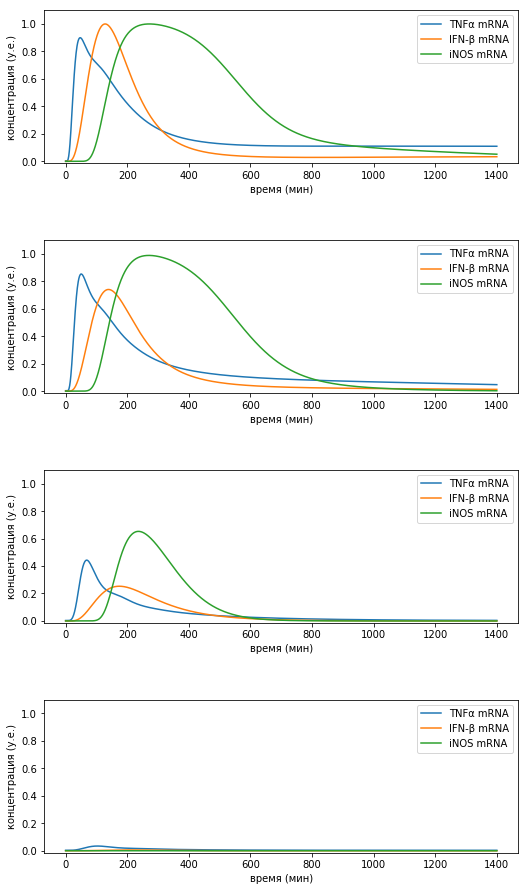

In [7]:
fig, subplots = plt.subplots(nrows=4, ncols=1, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.4) #wspace=0.2)
#fig1, subplots = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0.4)
pylab.legend(('TNFα mRNA', 'IFN-β mRNA', 'iNOS mRNA'))

for subplot in range(len(lps)):
    replace_m = m
    lps_str = 'Концентрация LPS = ' + str(round(lps[subplot]*10000)) + ' нг/мл;'
    #model_str = 'at (time > 720): LPS = ' + str(lps[subplot]) + ';'
    replace_m = m.replace('//at (time > 30):', 'at (time > 1440):')  #менять событие тут
    model = te.loada(replace_m)
    area = []
    maxi = []
    for species in 'TNFa_mRNA', 'IFNb_mRNA', 'iNOS_mRNA': 
    #for species in 'AP1_0', 'NFkBDNA_P__nuc', 'STAT':
        for_calibr.resetToOrigin()                         
        for_u_e = for_calibr.simulate(0, 2440, 6882, selections = ['time', species])
        maxim = max(for_u_e[species])
        calibration = []
        model.resetToOrigin()
        model.LPS = lps[subplot]
        n = model.simulate(0, 1400, 1401, selections = ['time', species])
        if species == 'TNFa_mRNA':
            for i in range(len(n[species])):
                calibration.append(n[i][1]/maxim-0.10)
            maxi.append(max(calibration))
            area.append(abs(round(np.trapz((n[species]/maxim-0.1), n['time'])))-2)
        else:
            for i in range(len(n[species])):
                calibration.append(n[i][1]/maxim)
            area.append(abs(round(np.trapz((n[species]/maxim), n['time']), 0)))
            maxi.append(max(calibration))
        for integrl in area:
            if integrl > maximi:
                maximi = integrl
        
        c = fig.axes[subplot].plot(n['time'], calibration)
        
        
        fig.set_size_inches(8.5, 15.5)
        #fig.axes[subplot].set_title(lps_str)
        pylab.legend(('TNFα mRNA', 'IFN-β mRNA', 'iNOS mRNA'))
        fig.axes[subplot].set_ylabel('концентрация (у.е.)')
        fig.axes[subplot].set_xlabel('время (мин)')
        fig.axes[subplot].set_ylim(-0.015, 1.1)
        plt.subplots_adjust(hspace=0.5) #wspace=0.2)
        fig.axes[subplot].legend(('TNFα mRNA', 'IFN-β mRNA', 'iNOS mRNA'))
        
        
  
    if subplot == 0:
        for i in range(len(area)):
            area[i] = abs(round(area[i]/maximi, 3))
            print(area[i], end = ' : ')
            slovar['50'].append(maxi[i])
    elif subplot == 1:
        for i in range(len(area)):
            area[i] = abs(round(area[i]/maximi, 3))
            print(area[i], end = ' : ')
            slovar['20'].append(maxi[i])
    elif subplot == 2:
        for i in range(len(area)):
            area[i] = abs(round(area[i]/maximi, 3))
            print(area[i], end = ' : ')
            slovar['5'].append(maxi[i])
    else:
        for i in range(len(area)):
            area[i] = abs(round(area[i]/maximi, 3))
            print(area[i], end = ' : ')
            slovar['1'].append(maxi[i])
    #c = fig1.axes[subplot].bar(speci, area)
    #fig1.set_size_inches(3, 7)
pylab.legend(('TNFα mRNA', 'IFN-β mRNA', 'iNOS mRNA'))
#print(maximi)

In [8]:
#slovar

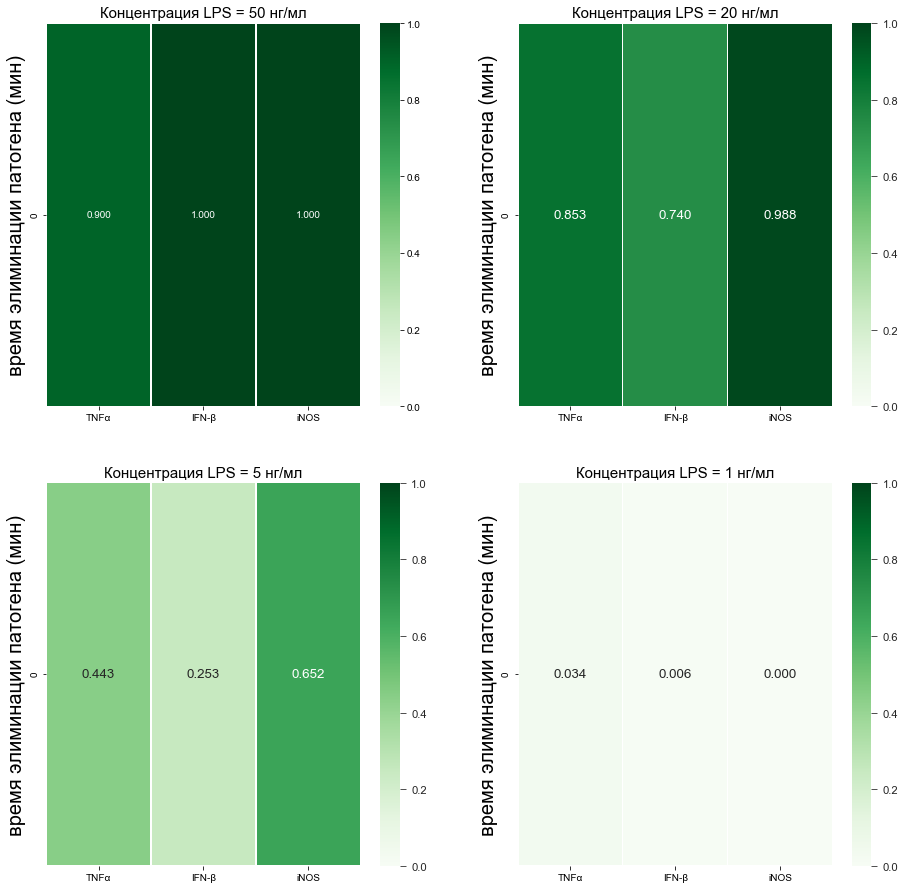

In [9]:
#{'TNFa': [], 'IFN-β': [], 'iNOS': []}
#species = ['TNFa', 'IFN-β', 'iNOS']
#print(len(slovar))
#help_me = []
for_title = ['Концентрация LPS = 50 нг/мл', 'Концентрация LPS = 20 нг/мл', 'Концентрация LPS = 5 нг/мл', 'Концентрация LPS = 1 нг/мл']
fig, subplots = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
d = pd.DataFrame(slovar)
#print(d)
for lppps in range(len(slovar)):
    help_me = None
    dicti = {'TNFα': [], 'IFN-β': [], 'iNOS': []}
    k = d.iloc[:, lppps]
    help_me = list(k)
    for i in range(len(help_me)):
        if i%3 == 0:
            dicti['TNFα'].append(help_me[i])
        elif i%3 == 1:
            dicti['IFN-β'].append(help_me[i])
        else:
            dicti['iNOS'].append(help_me[i])
    df = pd.DataFrame(dicti)
    #df.index = [2, 5, 10, 20, 30, 45, 60, 120, 360, 1440]
    c = sns.heatmap(df, annot=True, vmin = 0, vmax = 1, cmap="Greens",  fmt='.3f', linewidths=.3, ax = fig.axes[lppps])
    sns.set_context("paper", font_scale = 1.4)
    fig.set_size_inches(15.5, 15.5)
    fig.axes[lppps].set_ylabel('время элиминации патогена (мин)',  fontsize = 20)
    fig.axes[lppps].set_title(for_title[lppps], fontsize = 15)
    sns.set_style("ticks")
    #c = fig.axes[subplot].plot(n['time'], calibration)
    #ax = sns.heatmap(df, annot=True, cmap="Greens",  fmt='.3f', linewidths=.3) # col_cluster=False, row_cluster=False, metric = 'correlation')
#    species = ['TNFa', 'IFN-β', 'iNOS']
#sns.set_context("paper", font_scale = 20)
plt.show()
#d.index = species

#    ax = sns.heatmap(d, annot=True, cmap="Greens",  fmt='.3f', linewidths=.3) # col_cluster=False, row_cluster=False, metric = 'correlation')


Text(28.4,0.5,'Концентрация LPS (нг/мл)')

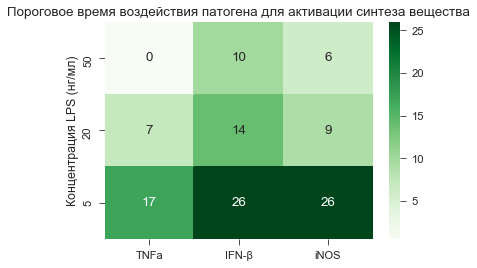

In [10]:
treshold = {'TNFa': [0.492, 7, 17], 'IFN-β': [10, 14, 26], 'iNOS': [6, 9, 26]} 
d = pd.DataFrame(treshold)
lpps = [50, 20, 5]
d.index = lpps

ax = sns.heatmap(d, annot=True, cmap="Greens",  fmt='.0f', linewidths=.0) # col_cluster=False, row_cluster=False, metric = 'correlation')
plt.title('Пороговое время воздействия патогена для активации синтеза вещества')
plt.ylabel('Концентрация LPS (нг/мл)')

In [11]:
dicti

{'TNFα': [0.03423541213550263],
 'IFN-β': [0.005641726843025729],
 'iNOS': [7.645597490479851e-12]}

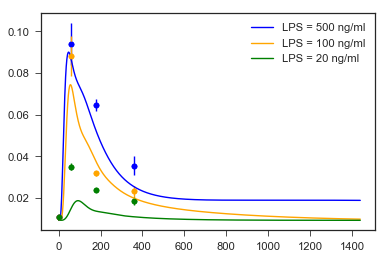

In [12]:
timee, tnf, tnf20, tnf100, tnf500 = [], [0], [0.0002, 'g'], [0.001, 'orange'], [0.005, 'blue']
with open ('C:\\Users\\1\\Desktop\\_\\working\\MAPK\\data\\TNFa_mRNA.txt') as text:
    for line in text:
        line = line.replace(',', '.').strip().split('\t')
        if line[0].isdigit():
            timee.append(float(line[0]))
            tnf.append(float(line[1])/0.2*0.08+0.008)
            tnf20.append(float(line[3])/0.2*0.08+0.008)
            tnf100.append(float(line[5])/0.2*0.08+0.008)
            tnf500.append(float(line[7])/0.2*0.08+0.008)
err500 = np.array([0.003835526, 0.06226867, 0.01731346, 0.02782595])
err100 = np.array([0.003835526, 0.05809872, 0.007279415, 0.01543741])
err20 = np.array([0.003835526, 0.009867268, 0.000959372, 0.01137925])

model = te.loada(m)
for i in [tnf500, err500], [tnf100, err100], [tnf20, err20]:
    model.resetToOrigin()
    model.LPS = i[0][0]
    color = i[0][1]
    k = model.simulate(0,1440, 1441, selections = ['time', 'TNFa_mRNA'])
    l = plt.plot(k['time'], k['TNFa_mRNA'], color = color)
    plt.scatter(timee, i[0][2:], color = color)
    plt.errorbar(timee, i[0][2:], color = color,  yerr=i[1]/0.2*0.033, fmt='o')
pylab.legend(('LPS = 500 ng/ml', 'LPS = 100 ng/ml', 'LPS = 20 ng/ml'))

Text(0,0.5,'мкмоль')

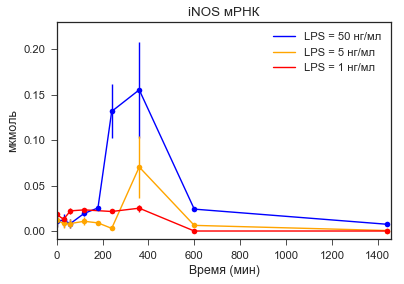

In [13]:
inos = pd.read_csv('iNOS_all_exp.txt', sep='\t', index_col=[0,1])
for u in list(inos.index.get_level_values('LPS').unique()):
        model.resetToOrigin()
        qeq = u.split(';')
        model.LPS = float(qeq[0])*0.1
        color = qeq[1]
        model.k_207 = 4.3
        plt.plot(inos.loc[u].index, [i for i in inos.loc[u].loc[:, 'mean_conc']/0.06*1.5e-01], color = color)
        n = model.simulate(0, 1440, 1441, selections = ['time', 'iNOS_mRNA'])
        #k = plt.plot(n['time'], n['iNOS_mRNA'], color = color)
        plt.title('iNOS мРНК')
        pylab.xlim (0, 1460)
        pylab.ylim (-9e-03, 2.3e-01)
        plt.errorbar(inos.loc[u].index, [i for i in inos.loc[u].loc[:, 'mean_conc']/0.06*1.5e-01],  yerr=[i for i in inos.loc[u].loc[:, 'std_conc']/0.06*1.5e-01/2], fmt='o', color = color)
pylab.legend(('LPS = 50 нг/мл', 'LPS = 5 нг/мл', 'LPS = 1 нг/мл'))
plt.xlabel('Время (мин)')
plt.ylabel('мкмоль')

Text(0,0.5,'мкмоль')

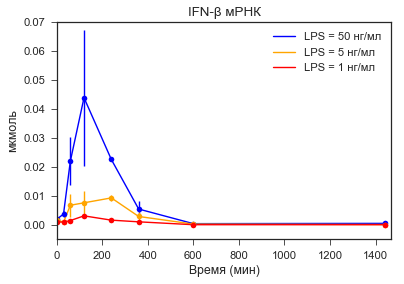

In [14]:
ifnb = pd.read_csv('IFNb_all_exp.txt', sep='\t', index_col=[0,1])
for u in list(ifnb.index.get_level_values('LPS').unique()):
        model.resetToOrigin()
        qeq = u.split(';')
        model.LPS = float(qeq[0])*0.1
        color = qeq[1]
        plt.plot(ifnb.loc[u].index, [i for i in ifnb.loc[u].loc[:, 'mean_conc']/0.015*0.041], color = color)
        n = model.simulate(0, 1440, 1441, selections = ['time', 'IFNb_mRNA'])
        #k = plt.plot(n['time'], n['IFNb_mRNA'], color = color)
        pylab.xlim (0, 1470)
        pylab.ylim (-0.005, 0.07)
        plt.errorbar(ifnb.loc[u].index, [i for i in ifnb.loc[u].loc[:, 'mean_conc']/0.015*0.041],  yerr=[i for i in ifnb.loc[u].loc[:, 'std_conc']/0.015*0.041/2], fmt='o', color = color)
        plt.title('IFN-β мРНК')
pylab.legend(('LPS = 50 нг/мл', 'LPS = 5 нг/мл', 'LPS = 1 нг/мл'))
plt.xlabel('Время (мин)')
plt.ylabel('мкмоль')

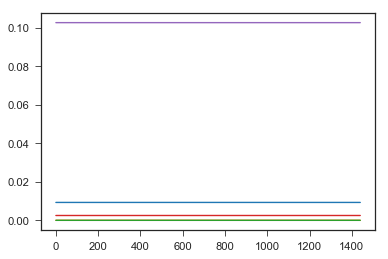

In [15]:
for i in 'TNFa_mRNA', 'IFNb_mRNA', 'iNOS_mRNA', 'WIP1_mRNA' ,'IRF3_7':
    for_calibr.resetToOrigin()
    for_calibr.LPS = 0
    k = model.simulate(0,1440, 1441, selections = ['time', i])
    l = plt.plot(k['time'], k[i])
    